In [102]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np

data = pd.read_csv('train.csv')

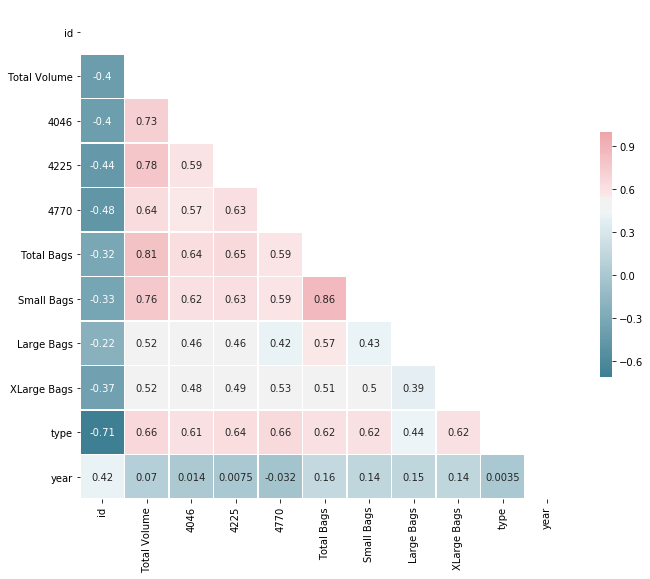

In [103]:
corr = x_train.corr(method="kendall")

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0.5,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

plt.show()

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt
lr = LinearRegression()

y_train = data['AveragePrice']
X_train = data.drop(['AveragePrice'], axis=1)
lr.fit(X_train,y_train)
X_train.head()

test = pd.read_csv('test.csv')

y_pred = lr.predict(test)
df_soln = pd.DataFrame(data = [test['id'], y_pred], index = None)
df = df_soln.transpose()
df['id'] = df['id'].astype(int)
df.columns = ['id','AveragePrice']
df.to_csv('soln10.csv',index = False)